In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def trapezoid_method(a,b,N,f):
    Nint = int(N)
    xvals = np.linspace(a,b,Nint+1)
    fvals = f(xvals)
    dx = (b-a)/N
    return dx/2.*(fvals[0] + fvals[Nint] + 2.*np.sum(fvals[1:Nint])) 

In [16]:
def simpson_method(a,b,N,f):
    Nint = int(N)
    TNint = 2*Nint
    xvals = np.linspace(a,b,TNint+1)
    fvals = f(xvals)
    dx = (b-a)/(2.*N)
    return dx/3.*(fvals[0] + fvals[TNint] + 2.*np.sum(fvals[2:TNint-1:2]) + 4.*np.sum(fvals[1:TNint:2])) 

**Problem 1**: (2pts for each part) When we write 
    
` 
xvals = np.linspace(a,b,int(n)+1)
`

we are generating a sequence of points $x_{j}$ such that 

$$
\mbox{xvals[j]} = x_{j}, ~ x_{j} = a + j\delta x, ~ \delta x = \frac{b-a}{n}, ~ j=0,\cdots,n.
$$

Thus, if I wanted to generate a sequence of points between $a=1$ and $b=9$ with spacing $\delta x=.25$, then I would find 

$$
.25 = \frac{9-1}{n}
$$

so that $n = 32$.  I could then generate these points via the code

`
xvals = np.linspace(1.,9.,32 + 1)
`

Using the model, write the code which will generate

1a) A sequence of points between $a=0$ and $b=10$ with spacing $\delta x = 10^{-3}$.

1b) A sequence of points between $a=2$ and $b=18$ with spacing $\delta x = 2^{-m}$, where $m$ is a positive integer that a user would specify.  

1c) From problem 1a, using array slicing, what code would I write to find the points $x_{j}$ such that $1\leq x_{j} \leq 9$?  Your answer should be in the form `xvals[n1:n2]` where `n1` and `n2` are two integers you must find.  

1d) From problem 1b, using array slicing, what code would I write to find the points $x_{j}$ such that $6\leq x_{j} \leq 10$?  Your answer should be in the form `xvals[n1:n2]` where `n1` and `n2` are two integers you must find, though they will be in terms of $m$.    


In [ ]:
#1a) 
xvals = np.linspace(0,10,int(1e4)+1)
#1b)
xvals = np.linspace(2,18,int(2**(m-4))+1)
#1c)
xvals[1000:9001]
#1d)
xvals[2**(m+2):2**(m+3)+1]

**Problem 2**: (10 pts) A particle of mass $m$ moving through a fluid is subjected to viscous resistance $R(v)$, where $v$ is the particle's velocity.  Suppose that relationship between the resistance $R$, velocity $v$, and the time of travel is given by 
$$
t = \int_{v_{0}}^{v(t)} \frac{m}{R(u)} du, 
$$
where $v_{0} = v(0)$ is the intial velocity of the particle.  Now suppose that 
$$
R(v) = -R_{\infty}\left(\frac{2}{1 + e^{-v^2/v_{c}^{2}}}-1\right).
$$
For a particle of mass $m=1 ~kg$ (kilograms), with $v_{0}=10 ~m/s$ (meters/second), and $v_{c} = 2 ~m/s$ and $R_{\infty} = 3 ~kg ~m/s^{2}$, using the Trapezoid Method, find the approximate time necessary for the particle to slow to $v(t) = 5 ~ m/s$.

In [9]:
Rinf = 3.
vc = 2.
m = 1.
R = lambda v: Rinf*m*(2./(1+np.exp(-v**2./vc**2.))-1.)

Nvals = np.array([1e1,1e2,1e3,1e4,1e5,1e6])
for Nval in Nvals:
    tfin = trapezoid_method(5.,10.,Nval,R)
    print("Current approximation for N= %1.1e is: %1.15f" % (int(Nval),tfin))



Current approximation for N= 1.0e+01 is: 14.995087112821299
Current approximation for N= 1.0e+02 is: 14.995670475290510
Current approximation for N= 1.0e+03 is: 14.995676423468350
Current approximation for N= 1.0e+04 is: 14.995676482961736
Current approximation for N= 1.0e+05 is: 14.995676483556666
Current approximation for N= 1.0e+06 is: 14.995676483562624


We see from running the trapezoid method over six different choices of $N$, ranging from $N=10$ to $N=10^{6}$ that we clearly converge on a result for $t\approx 14.99567648$s.  

**Problem 3** (20 pts): In class, we showed that Simpson's method for finding the integral 

$$
T_{[a,b]}(f) = \int_{a}^{b} f(x) dx, 
$$

over a mesh $\left\{ x_{j} \right\}_{j=0}^{2N}$, $x_{j} = a + j\delta x$, $\delta x = (b-a)/(2N)$, is found via a series of local approximations via the formula 

\begin{align*}
\int_{a}^{b} f(x) dx = & \sum_{l=0}^{N-1} \int_{x_{2l}}^{x_{2l+2}} f(x) dx \\
\approx & \sum_{l=0}^{N-1} \int_{x_{2l}}^{x_{2l+2}} y_{2l+1}(x;x_{2l+1}) dx 
\end{align*}

where the approximating interpolatory polynomial $y_{2l+1}(x;x_{2l+1})$ is given by 

$$
y_{2l+1}(x;x_{2l+1}) = a_{2l+1}\left(x-x_{2l+1} \right)^{2} + b_{2l+1}\left(x-x_{2l+1} \right) + c_{2l+1}.
$$

The coefficients $a_{2l+1}$, $b_{2l+1}$, and $c_{2l+1}$ are found via the _interpolation_ requirements

\begin{align*}
y_{2l+1}(x_{2l};x_{2l+1}) = & f\left(x_{2l}\right) = f_{2l}\\
y_{2l+1}(x_{2l+1};x_{2l+1}) = & f\left(x_{2l+1}\right) = f_{2l+1}\\
y_{2l+1}(x_{2l+2};x_{2l+1}) = & f\left(x_{2l+2}\right) = f_{2l+2}\\
\end{align*}

* **Part a)** (5 pts) Using the above interpolatory requirements, show that 
$$
a_{2l+1} = \frac{1}{2(\delta x)^{2}}\left(f_{2l} -2f_{2l+1} + f_{2l+2} \right), ~ b_{2l+1} = \frac{1}{2\delta x}\left(f_{2l+2}-f_{2l} \right), ~ c_{2l+1} = f_{2l+1}
$$

* **Part b)** (5 pts) Using the Taylor series expansions
\begin{align*}
f_{2l} = f\left(x_{2l+1}-\delta x\right) = f_{2l+1} - f'\left(x_{2l+1}\right)\delta x + \frac{1}{2}f''\left(x_{2l+1}\right)(\delta x)^{2} - \frac{1}{6}f'''\left(x_{2l+1}\right)(\delta x)^{3} + C_{2l+1}(\delta x)^{4}\\
f_{2l+2} = f\left(x_{2l+1}+\delta x\right) = f_{2l+1} + f'\left(x_{2l+1}\right)\delta x + \frac{1}{2}f''\left(x_{2l+1}\right)(\delta x)^{2} + \frac{1}{6}f'''\left(x_{2l+1}\right)(\delta x)^{3} + \bar{C}_{2l+1}(\delta x)^{4}
\end{align*}
show that 
\begin{multline}
y_{2l+1}\left(x;x_{2l+1}\right) = f_{2l+1} + f'\left(x_{2l+1}\right)\left(x-x_{2l+1}\right) + \frac{f''(x_{2l+1})}{2}\left(x-x_{2l+1}\right)^{2} \\
+ \frac{(\delta x)^{2}}{2}\left(\frac{1}{3}f'''\left(x_{2l+1}\right) + \left(\bar{C}_{2l+1}-C_{2l+1}\right)\delta x\right)\left(x-x_{2l+1}\right) + \frac{1}{2}\left(C_{2l+1}+\bar{C}_{2l+1}\right)\left(\delta x\right)^{2}\left(x-x_{2l+1}\right)^{2}
\end{multline}

* **Part c)** (5 pts) Using the Taylor series expansion
$$
f(x) = f_{2l+1} + f'\left(x_{2l+1}\right)\left(x - x_{2l+1} \right) + \frac{1}{2}f''(x_{2l+1})\left(x - x_{2l+1} \right)^{2} + \frac{1}{6}f'''(x_{2l+1})(x-x_{2l+1})^{3} + \tilde{C}_{2l+1}\left(x-x_{2l+1}\right)^{4}
$$
show that 
\begin{align}
\int_{x_{2l}}^{x_{2l+2}} \left(f(x) - y_{2l+1}(x;x_{2l+1}) \right) dx = & \left(\frac{2}{5}\tilde{C}_{2l+1} - \frac{1}{3}\left(C_{2l+1}+\bar{C}_{2l+1}\right) \right)(\delta x)^{5}\\
= & \hat{C}_{2l+1}\left(\delta x \right)^{5},
\end{align}
where we use the relabeling
$$
\hat{C}_{2l+1} \equiv \frac{2}{5}\tilde{C}_{2l+1} - \frac{1}{3}\left(C_{2l+1}+\bar{C}_{2l+1}\right)
$$

* **Part d)** (5 pts) Letting the global Simpson's approximation be $A_{2N}(f)$ where
\begin{align}
A_{2N}(f) = & \sum_{l=0}^{N-1} \int_{x_{2l}}^{x_{2l+2}} y_{2l+1}(x;x_{2l+1}) dx \\
= &\frac{\delta x}{3}\left(f_{0} + f_{2N} + 2\sum_{l=1}^{N-1}f_{2l} + 4\sum_{l=0}^{N-1}f_{2l+1} \right)
\end{align}
show that 
$$
T_{[a,b]}(f) - A_{2N}(f) = \frac{\hat{C}_{M}}{2}(b-a)(\delta x)^{4}
$$
where $\hat{C}_{M}$ is the biggest of all the constants $\hat{C}_{2l+1}$ (Note, technically we should have inequalities throughout all of this, but we are only telling a small fib...)

_Solution_ :
    
So, given that we immediately have that 

$$
y_{2l+1}(x_{2l+1}) = c_{2l+1},
$$

then we have $c_{2l+1} = f_{2l+1}$.  The other two interpolatory requirements then give us

\begin{align}
a_{2l+1}(\delta x)^{2} - b_{2l+1}\delta x = & f_{2l} - f_{2l+1}\\
a_{2l+1}(\delta x)^{2} + b_{2l+1}\delta x = & f_{2l+2} - f_{2l+1}
\end{align}

Adding these two expressions immediately gets us

$$
a_{2l+1} = \frac{1}{(\delta x)^{2}}\left(f_{2l+2} - 2f_{2l+1} + f_{2l}\right)
$$

Subtracting likewise immediately gives us

$$
b_{2l+1} = \frac{1}{2 \delta x}\left(f_{2l+2} - f_{2l}\right)
$$


Proceeding then, by plugging the Taylor series for $f_{2l}$ and $f_{2l+2}$ into the formulas for $a_{2l+1}$ and $b_{2l+1}$, we get 

$$
a_{2l+1} = f''(x_{2l+1}) + \left(C_{2l+1} + \tilde{C}_{2l+1} \right)(\delta x)^2
$$

and

$$
b_{2l+1} = f'(x_{2l+1}) + \frac{f'''(x_{2l+1})}{6}(\delta x)^{2} + \frac{1}{2}\left(\tilde{C}_{2l+1} -C_{2l+1}\right)(\delta x)^{3}.
$$

Using these formula then readily give us the expression for $y_{2l+1}(x;x_{2l+1})$ above.  

As for the integral, we use that a substitution $u = x-x_{2l+1}$ changes the bounds of integration to $\pm \delta x$, which means we are integrating across a symmetric interval.  Thus, only even terms should remain after integration.  Thus we have 

\begin{align*}
\int_{x_{2l}}^{x_{2l+2}} \left(f(x) - y_{2l+1}(x;x_{2l+1}) \right) dx = & \int_{-\delta x}^{\delta x} \left(\tilde{C}_{2l+1}u^{4}- \frac{1}{2}\left(C_{2l+1}+\bar{C}_{2l+1}\right)\left(\delta x\right)^{2}u^{2} \right)du\\
& = \left(\frac{2\tilde{C}_{2l+1}}{5}-\frac{\left(C_{2l+1}+\bar{C}_{2l+1}\right)}{3}\right)(\delta x)^{5}
\end{align*}

**Problem 4** (10 pts): Choose an example and using the code from Lecture 5 as a model, numerically verify the error analysis we performed for Simpson's method above by generating a log/log plot and a corresponding estimate of the slope of the plotted line.  Note, you may have to use clever choices for $N$ or slicing choices in order to remove nan terms and the like from your slope estimates.  Provide a brief summary of your results.  

In [17]:
def test_fun(xvals):
    return np.exp(xvals)

The minimum slope is -3.999870978879812
The maximum slope is 0.124938736608300
The mean slope is -2.831158426323007


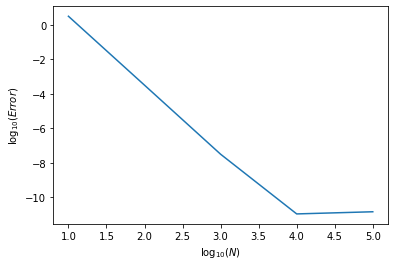

In [21]:
def error_test(a,b,f):
    tval = np.exp(b) - np.exp(a)
    Nvals = np.array([1e1,1e2,1e3,1e4,1e5])
    Evals = np.zeros(Nvals.size)
    for jj in range(Nvals.size):
        Evals[jj] = np.ma.log10(np.abs(simpson_method(a,b,Nvals[jj],f)-tval))
    xvals = np.log10(Nvals)
    plt.plot(xvals,Evals)
    plt.xlabel('$\log_{10}(N)$')
    plt.ylabel('$\log_{10}(Error)$')
    novals = Evals.size
    slopes = Evals[1:]-Evals[:novals-1]
    print("The minimum slope is %1.15f" % np.min(slopes))
    print("The maximum slope is %1.15f" % np.max(slopes))
    print("The mean slope is %1.15f" % np.mean(slopes))
    
error_test(2,10,test_fun)

So, using the somewhat dull integral

$$
\int_{a}^{b} e^{x} dx = e^{b} - e^{a}
$$

letting $a=2$ and $b=10$, we see that Simpson's method has the predicted order of error of $p=4$.  Moreover, when $N=2\times10^{4}$, we see that we have obtained as much accuracy as is practically possible.  Thus, looking at smaller intervals is essentially pointless, at least for this particular case.  